# Understanding the problem statement 

We have our Mall client who wants us to cluster their cutomer into some segments through which they can find their regular customer and do some businees insite to keep them attached with mall and so on.



# importing the libraries and dataset

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [8]:
customer_data = pd.read_csv("Mall_Customers.csv")

In [9]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Exploratory data analysis

In [10]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
customer_data.shape

(200, 5)

In [13]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

choosing the required column for our clustring 
these are ['annual income' ' spending score']

In [18]:
x = customer_data.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

In [19]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# choosing the number of cluster
we use
WCSS - Within Cluster Sum of Squares value and by using elbow we can say which value of K is optimum

In [20]:
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=20)
    kmean.fit(x)
    wcss.append(kmean.inertia_)
    

C:\Users\Inevitable\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Inevitable\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Inevitable\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Inevitable\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with

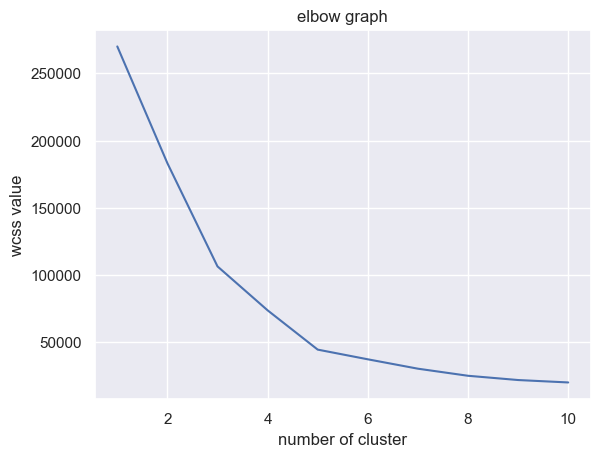

In [23]:
# ploting elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('elbow graph')
plt.xlabel('number of cluster')
plt.ylabel('wcss value')
plt.show()


In [24]:
# So we choose cluster number  = 5 because after that there is no significant drop in wcss value.


# training the model

In [26]:
kmeans = KMeans(n_clusters=5, random_state= 20, init='k-means++')

# returning the cluster value of each data point
a= kmeans.fit_predict(x)
print(a)

C:\Users\Inevitable\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Inevitable\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 2 4 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [27]:
a.shape

(200,)

# Data viualisation


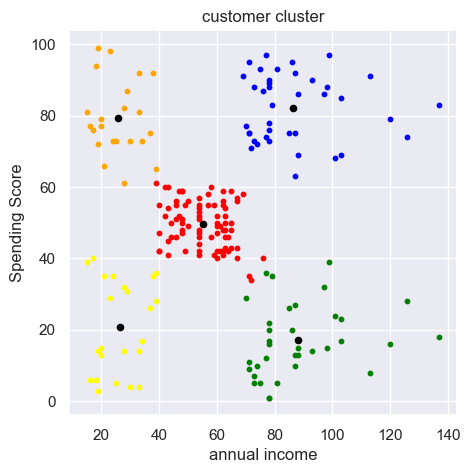

In [38]:
plt.figure(figsize=(5,5))
plt.scatter(x[a==0,0], x[a==0,1], s=10, c='green', label = "cluster 1") #here in first a=0,1,2,3,4 represents cluster number, a=0,0,0,0,0 represents matics x first value x[0]  
plt.scatter(x[a==1,0], x[a==1,1], s=10, c='blue', label = "cluster 2")  # second a=0,1,2,3,4 represents cluster number, a=0,0,0,0,0 represents matics x second value x[1]
plt.scatter(x[a==2,0], x[a==2,1], s=10, c='red', label = "cluster 3")
plt.scatter(x[a==3,0], x[a==3,1], s=10, c='orange', label = "cluster 4")
plt.scatter(x[a==4,0], x[a==4,1], s=10, c='yellow', label = "cluster 5")

# plotting centroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=20, c='black', label='centroid')
plt.title("customer cluster")
plt.xlabel("annual income")
plt.ylabel("Spending Score")
plt.show()